<a href="https://colab.research.google.com/github/lim4373/Opencv2/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf


#### 데이터 가져오기
* https://www.tensorflow.org/datasets/catalog/cats_vs_dogs?hl=ko

* data_train: 학습 데이터셋을 저장하는 변수 data_train에는 "cats_vs_dogs" 데이터셋의 학습 데이터가 저장

In [ ]:
data_train,ds_info =tfds.load("cats_vs_dogs",split=[tfds.Split.TRAIN],with_info=True)
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete86IODI/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp9vp_cgvrtfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

#### 데이터 확인

In [ ]:
images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

30

(-0.5, 349.5, 261.5, -0.5)

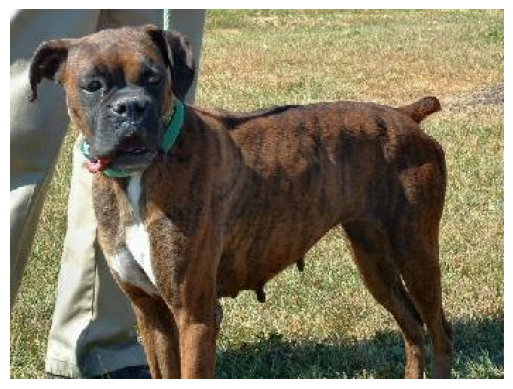

In [ ]:
plt.imshow(images[0])
plt.axis("off")

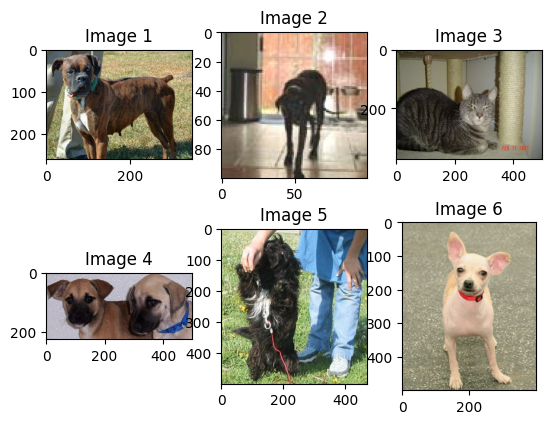

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2, 3, 1)  # 2행 3열의 서브플롯 중 첫 번째
plt.imshow(images[0])
plt.title('Image 1')

plt.subplot(2, 3, 2)  # 2행 3열의 서브플롯 중 두 번째
plt.imshow(images[5])
plt.title('Image 2')

plt.subplot(2, 3, 3)  # 2행 3열의 서브플롯 중 세 번째
plt.imshow(images[12])
plt.title('Image 3')

plt.subplot(2, 3, 4)  # 2행 3열의 서브플롯 중 네 번째
plt.imshow(images[20])
plt.title('Image 4')

plt.subplot(2, 3, 5)  # 2행 3열의 서브플롯 중 다섯 번째
plt.imshow(images[23])
plt.title('Image 5')

plt.subplot(2, 3, 6)  # 2행 3열의 서브플롯 중 여섯 번째
plt.imshow(images[29])
plt.title('Image 6')

plt.show()


#### resnet50
* weights(para): 가중치
* 120만개 이상의 이미지를 학습한 imagenet이라는 가중치

### https://jisuhan.tistory.com/71

In [ ]:
resnet50_pre=tf.keras.applications.resnet.ResNet50(weights='imagenet',input_shape=(224,224,3))
resnet50_pre.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

### 테스트 코드

In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
def pred_img(img):
  plt.imshow(img)
  plt.axis("off")
  plt.show()


  img_resized= cv2.resize(img,(224,224))
  pred = resnet50_pre.predict(img_resized.reshape([1, 224, 224,3]))
  decoded_pred= decode_predictions(pred)#예측된 결과가 어떤 대상인지 알려줌

  for i, instance in enumerate(decoded_pred[0]):
    print("{}위: {} ({:.2f}%)".format(i+1,instance[1],instance[2]*100))

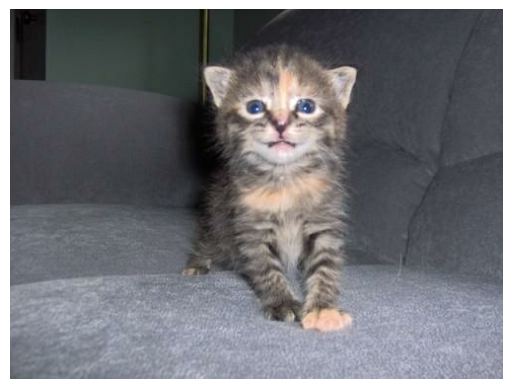

1/1 [==============================] - 0s 290ms/step


In [ ]:
pred_img(images[16])

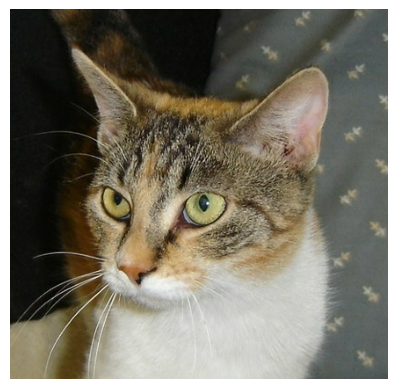

1/1 [==============================] - 0s 210ms/step
1위: tabby (46.71%)
2위: tiger_cat (29.29%)
3위: Egyptian_cat (9.55%)
4위: lynx (5.08%)
5위: Siamese_cat (2.84%)


In [59]:
random_index = np.random.randint(0, len(images))
pred_img(images[random_index])

##### https://velog.io/@och9854/F-14-%EA%B0%95%EC%95%84%EC%A7%80-%EA%B3%A0%EC%96%91%EC%9D%B4-%EB%B6%84%EB%A5%98%EA%B8%B0
따라해보기
